In [14]:
import imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv("../data/processed/data_engineered_rizcallah_1122.csv")
data.head()

,Unnamed: 0,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,5,False,0.112821,0.000000,0.812500,8.320,0.030625,0.012564,0.111364,...,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,5,False,0.097436,0.005128,0.705521,7.498,0.028221,0.011795,0.121053,...,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,3,6,True,0.025000,0.050000,0.601266,6.004,0.023734,0.006696,0.267857,...,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,4,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,prop_free_sulfur,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,0.323529,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,False,0.112821,0.000000,0.812500,8.320,0.030625,0.012564,0.111364,0.373134,...,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,False,0.097436,0.005128,0.705521,7.498,0.028221,0.011795,0.121053,0.277778,...,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,True,0.025000,0.050000,0.601266,6.004,0.023734,0.006696,0.267857,0.283333,...,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,False,0.094595,0.000000,0.541311,6.669,0.021652,0.010270,0.108571,0.323529,...,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
data['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Data is very unbalanced. To correct for this, we are going to use what is called: Synthetic Minority Oversampling TEchnique. SMOTE. It is similar to bootstrapping. It will resample the under-represented categories in order to create a balances dataset. However, I think going from 10 examples to 600 examples is probably too much. I will try it, and then also try sampling ~100 example from each quality level and see which model works better.**

In [22]:
oversampler = SMOTE()
X = data.drop(['quality', 'is_high_qual'], axis=1)
y = data['quality']
X, y = oversampler.fit_resample(X,y)


4086

In [24]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

**We now have 681 examples in each category! Time to build and test a model.**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [42]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train.value_counts()

7    565
4    550
3    549
8    547
5    531
6    526
Name: quality, dtype: int64

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
model = LogisticRegression(multi_class='multinomial', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [45]:
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.5684596577017115

**Now try with only ~100 from each quality**

In [50]:
q3 = data[data['quality']==3]
q4 = data[data['quality']==4]
q5 = data[data['quality']==5]
q6 = data[data['quality']==6]
q7 = data[data['quality']==7]
q8 = data[data['quality']==8]



In [64]:
def resample_func(series, n):
    rands = np.random.randint(1, len(series), size=n)
    sample = series.iloc[rands,:]
    return(sample)

In [71]:
np.random.seed(12)
q3_100 = resample_func(q3, 100)
q4_100 = resample_func(q4, 100)
q5_100 = resample_func(q5, 100)
q6_100 = resample_func(q6, 100)
q7_100 = resample_func(q7, 100)
q8_100 = resample_func(q8, 100)

data_100 = q3_100.append(q4_100).append(q5_100).append(q6_100).append(q7_100).append(q8_100).reset_index()
data_100

,index,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1469,3,False,0.134247,0.006849,0.634441,6.9510,0.018429,0.008356,0.062245,...,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
1,690,3,False,0.160135,0.000000,1.170799,15.4275,0.026722,0.013108,0.081857,...,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
2,832,3,False,0.042308,0.040385,0.443787,5.0700,0.042899,0.013942,0.329545,...,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
3,899,3,False,0.122892,0.002410,0.977011,11.8320,0.024138,0.010120,0.082353,...,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
4,899,3,False,0.122892,0.002410,0.977011,11.8320,0.024138,0.010120,0.082353,...,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,390,8,True,0.151786,0.008929,0.393258,4.9840,0.012640,0.008036,0.052941,...,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
596,1449,8,True,0.052778,0.043056,0.619195,6.4600,0.017337,0.007778,0.147368,...,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3
597,498,8,True,0.032710,0.049533,0.825397,8.1900,0.022222,0.006542,0.200000,...,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
598,495,8,True,0.032710,0.049533,0.825397,8.1900,0.022222,0.006542,0.200000,...,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0


In [73]:
X_100 = data_100.drop(['index', 'quality', 'is_high_qual'], axis=1)
y_100 = data_100['quality']

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X_100, y_100, test_size=0.2)

In [77]:
y_train.value_counts()

3    86
8    82
7    80
6    78
5    78
4    76
Name: quality, dtype: int64

In [79]:
model = LogisticRegression(multi_class = 'multinomial', max_iter=10000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.49166666666666664

In [85]:
print(pd.DataFrame({"pred":pred, "act":y_test}))
print((pred - y_test).mean())

     pred  act
360     6    6
239     3    5
365     7    6
306     7    6
575     8    8
..    ...  ...
69      3    3
562     7    8
253     5    5
136     4    4
9       3    3

[120 rows x 2 columns]
-0.24166666666666667


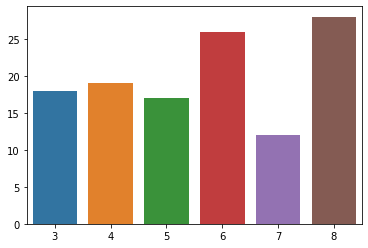

In [92]:
sns.barplot(x=y_test.unique(), y=np.unique(pred, return_counts=True)[1])

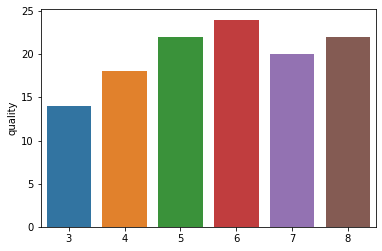

In [93]:
sns.barplot(x=y_test.unique(), y=y_test.value_counts())

**One last thing I want to try. Oversampling but not all the way...**

In [100]:
data_partSmote = q3_100.append(q4_100).append(q5).append(q6).append(q7).append(q8_100).reset_index()
data_partSmote['quality'].value_counts()

5    681
6    638
7    199
8    100
4    100
3    100
Name: quality, dtype: int64

In [103]:
X_partSmote = data_partSmote.drop(['index', 'quality', 'is_high_qual'], axis=1)
y_partSmote = data_partSmote['quality']
y_partSmote.value_counts()

5    681
6    638
7    199
8    100
4    100
3    100
Name: quality, dtype: int64

In [105]:
X_partSmote

,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,prop_free_sulfur,starting_density,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.134247,0.006849,0.634441,6.9510,0.018429,0.008356,0.062245,0.408163,1.068461,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
1,0.160135,0.000000,1.170799,15.4275,0.026722,0.013108,0.081857,0.357143,1.075373,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
2,0.042308,0.040385,0.443787,5.0700,0.042899,0.013942,0.329545,0.708333,1.071204,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
3,0.122892,0.002410,0.977011,11.8320,0.024138,0.010120,0.082353,0.545455,1.079902,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
4,0.122892,0.002410,0.977011,11.8320,0.024138,0.010120,0.082353,0.545455,1.079902,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,0.151786,0.008929,0.393258,4.9840,0.012640,0.008036,0.052941,0.136364,1.087370,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
1814,0.052778,0.043056,0.619195,6.4600,0.017337,0.007778,0.147368,0.517241,1.077911,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3
1815,0.032710,0.049533,0.825397,8.1900,0.022222,0.006542,0.200000,0.312500,1.078182,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1816,0.032710,0.049533,0.825397,8.1900,0.022222,0.006542,0.200000,0.312500,1.078182,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0


In [109]:
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X_partSmote, y_partSmote, test_size=0.2)
y_train.value_counts()

5    546
6    515
7    153
4     84
8     79
3     77
Name: quality, dtype: int64

In [110]:
model = LogisticRegression(multi_class='multinomial', max_iter=10000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.5302197802197802

**Let's try one where we oversample the hell out of everything. Why not?**

In [155]:
# Split off 20% of the original data, for testing. I should have been doing this the whole time.
data_splitoff = np.random.choice(data.index, size=int(np.round(data.shape[0]*0.2)), replace=False)
data_splitoff = data.iloc[data_splitoff, :]
keep_index = list(set(data.index) - set(data_splitoff.index))
data_keep = data.iloc[keep_index, :]

In [165]:
q3k = data_keep[data_keep['quality'] == 3]
q4k = data_keep[data_keep['quality'] == 4]
q5k = data_keep[data_keep['quality'] == 5]
q6k = data_keep[data_keep['quality'] == 6]
q7k = data_keep[data_keep['quality'] == 7]
q8k = data_keep[data_keep['quality'] == 8]

q3k_1000 = resample_func(q3k, 1000)
q4k_1000 = resample_func(q4k, 1000)
q5k_1000 = resample_func(q5k, 1000)
q6k_1000 = resample_func(q6k, 1000)
q7k_1000 = resample_func(q7k, 1000)
q8k_1000 = resample_func(q8k, 1000)

data_1000 = q3k_1000.append(q4k_1000).append(q5k_1000).append(q6k_1000).append(q7k_1000).append(q8k_1000).reset_index()
data_1000

,index,quality,is_high_qual,vol_fixed_ratio,prop_citric_acid,sugar_acidity_ratio,sugar_acidity_interaction,chlor_acid_ratio,chlor_fixed_ratio,chlor_vol_ratio,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1469,3,False,0.134247,0.006849,0.634441,6.951,0.018429,0.008356,0.062245,...,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
1,899,3,False,0.122892,0.002410,0.977011,11.832,0.024138,0.010120,0.082353,...,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
2,1469,3,False,0.134247,0.006849,0.634441,6.951,0.018429,0.008356,0.062245,...,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
3,1478,3,False,0.123239,0.007042,1.676471,19.380,0.024118,0.011549,0.093714,...,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
4,899,3,False,0.122892,0.002410,0.977011,11.832,0.024138,0.010120,0.082353,...,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,828,8,True,0.073077,0.011538,0.664740,7.958,0.018786,0.008333,0.114035,...,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7
5996,1269,8,True,0.089091,0.005455,0.514286,6.300,0.012571,0.008000,0.089796,...,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0
5997,1061,8,True,0.043956,0.054945,0.560748,5.778,0.022118,0.007802,0.177500,...,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5
5998,498,8,True,0.032710,0.049533,0.825397,8.190,0.022222,0.006542,0.200000,...,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0


In [167]:
X_train = data_1000.drop(['index', 'quality', 'is_high_qual'], axis=1)
y_train = data_1000['quality']
X_test = data_splitoff.drop(['quality', 'is_high_qual'], axis=1)
y_test = data_splitoff['quality']

In [178]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.046875

**They were all REEAAALLY bad on this heavily oversampled dataset. Logistic Regression did the best, with about 39% accuracy.**